In [156]:
import polars as pl
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns

pl.Config.set_tbl_rows(50)

polars.config.Config

In [157]:
# importing the dataset files, then merge them into one DF:
df1 = pl.read_csv(r'september_2020_trip_data.csv')
df2 = pl.read_csv(r'october_2020_trip_data.csv')
df3 = pl.read_csv(r'november_2020_trip_data.csv')
df4 = pl.read_csv(r'december_2020_trip_data.csv')
df5 = pl.read_csv(r'january_2021_trip_data.csv')
df6 = pl.read_csv(r'febuary_2021_trip_data.csv')
df7 = pl.read_csv(r'march_2021_trip_data.csv')
df8 = pl.read_csv(r'april_2021_trip_data.csv')
df9 = pl.read_csv(r'may_2021_trip_data.csv')
df10 = pl.read_csv(r'june_2021_trip_data.csv')
df11 = pl.read_csv(r'july_2021_trip_data.csv')
df12 = pl.read_csv(r'august_2021_trip_data.csv')

In [158]:
df = pl.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], how="diagonal_relaxed") 

In [159]:
# quick check:
df.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
str,str,str,str,str,str,str,str,f64,f64,f64,f64,str
"""2B22BD5F95FB2629""","""electric_bike""","""17/09/2020 14:27""","""17/09/2020 14:44""","""Michigan Ave & Lake St""","""52""","""Green St & Randolph St""","""112""",41.886692,-87.623561,41.88357,-87.648731,"""casual"""
"""A7FB70B4AFC6CAF2""","""electric_bike""","""17/09/2020 15:07""","""17/09/2020 15:07""","""W Oakdale Ave & N Broadway""",null,"""W Oakdale Ave & N Broadway""",null,41.94,-87.64,41.94,-87.64,"""casual"""
"""86057FA01BAC778E""","""electric_bike""","""17/09/2020 15:09""","""17/09/2020 15:09""","""W Oakdale Ave & N Broadway""",null,"""W Oakdale Ave & N Broadway""",null,41.94,-87.64,41.94,-87.64,"""casual"""
"""57F6DC9A153DB98C""","""electric_bike""","""17/09/2020 18:10""","""17/09/2020 18:35""","""Ashland Ave & Belle Plaine Ave""","""246""","""Montrose Harbor""","""249""",41.95606,-87.668916,41.963985,-87.638216,"""casual"""
"""B9C4712F78C1AE68""","""electric_bike""","""17/09/2020 15:16""","""17/09/2020 15:52""","""Fairbanks Ct & Grand Ave""","""24""","""Fairbanks Ct & Grand Ave""","""24""",41.89186,-87.621008,41.891346,-87.620325,"""casual"""


# data cleaning and feature engineering:

In [160]:
# check the duplicates:
df.is_duplicated().sum()

0

In [161]:
# convert sarted_at and ended_at to datetime data type:
df = df.with_columns([
    pl.col('started_at').str.to_datetime().alias('started_at'),
    pl.col('ended_at').str.to_datetime().alias('ended_at')
])

In [162]:
# separate date and time:
df = df.with_columns([
    pl.col('started_at').dt.date().alias('started_date'),
    pl.col('started_at').dt.time().alias('started_time'),
    pl.col('ended_at').dt.date().alias('ended_date'),
    pl.col('ended_at').dt.time().alias('ended_time')
])

In [163]:
# drop unwanted columns:
df = df.drop(['started_at' ,'ended_at','start_station_id', 'end_station_id'])

In [164]:
# creating new column 'trip_duration':
df = df.with_columns( (pl.col("ended_time") - pl.col("started_time")).alias("trip_duration"))

In [165]:
df = df.filter(pl.col("trip_duration") > pl.duration(seconds=0))

In [166]:
df.describe()

statistic,ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration
str,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str,str
"""count""","""4825467""","""4825467""","""4388686""","""4351251""",4.825467e6,4.825467e6,4.821045e6,4.821045e6,"""4825467""","""4825467""","""4825467""","""4825467""","""4825467""","""4825467"""
"""null_count""","""0""","""0""","""436781""","""474216""",0.0,0.0,4422.0,4422.0,"""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,41.902726,-87.645136,41.903024,-87.645354,null,"""2021-04-10 18:05:10.683000""","""14:44:30.022362""","""2021-04-10 18:04:50.414000""","""15:04:34.717663""","""0:20:04.695300"""
"""std""",null,null,null,null,0.044423,0.026739,0.04451,0.026906,null,null,null,null,null,null
"""min""","""000002EBE159AE82""","""classic_bike""","""2112 W Peterson Ave""","""2112 W Peterson Ave""",41.64,-87.84,41.51,-88.07,"""casual""","""2020-09-01""","""00:00:00""","""2020-09-01""","""00:01:00""","""0:01:00"""
"""25%""",null,null,null,null,41.882242,-87.659141,41.882261,-87.65919,null,"""2020-12-10""","""11:42:00""","""2020-12-10""","""12:02:00""","""0:07:00"""
"""50%""",null,null,null,null,41.89993,-87.64117,41.9,-87.641697,null,"""2021-05-26""","""15:31:00""","""2021-05-26""","""15:54:00""","""0:13:00"""
"""75%""",null,null,null,null,41.929465,-87.627716,41.929546,-87.627734,null,"""2021-07-17""","""18:17:00""","""2021-07-17""","""18:36:00""","""0:23:00"""
"""max""","""FFFFFF0C829D3E7A""","""electric_bike""","""Yates Blvd & 93rd St""","""Yates Blvd & 93rd St""",42.08,-87.52,42.15,-87.44,"""member""","""2021-08-31""","""23:58:00""","""2021-09-01""","""23:59:00""","""22:42:00"""


In [167]:
# outliers detection:
q1 = df.select(pl.col("trip_duration").quantile(0.10)).item()
q3 = df.select(pl.col("trip_duration").quantile(0.90)).item()

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df1 = df.filter(
    (pl.col("trip_duration") >= lower) &
    (pl.col("trip_duration") <= upper)
)
df1.head()


ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration
str,str,str,str,f64,f64,f64,f64,str,date,time,date,time,duration[ns]
"""2B22BD5F95FB2629""","""electric_bike""","""Michigan Ave & Lake St""","""Green St & Randolph St""",41.886692,-87.623561,41.88357,-87.648731,"""casual""",2020-09-17,14:27:00,2020-09-17,14:44:00,17m
"""57F6DC9A153DB98C""","""electric_bike""","""Ashland Ave & Belle Plaine Ave""","""Montrose Harbor""",41.95606,-87.668916,41.963985,-87.638216,"""casual""",2020-09-17,18:10:00,2020-09-17,18:35:00,25m
"""B9C4712F78C1AE68""","""electric_bike""","""Fairbanks Ct & Grand Ave""","""Fairbanks Ct & Grand Ave""",41.89186,-87.621008,41.891346,-87.620325,"""casual""",2020-09-17,15:16:00,2020-09-17,15:52:00,36m
"""378BBCE1E444EB80""","""electric_bike""","""Clark St & Armitage Ave""",null,41.918265,-87.63636,41.88,-87.62,"""casual""",2020-09-17,18:37:00,2020-09-17,19:23:00,46m
"""0CB5E2496B6F1DF8""","""electric_bike""","""Wells St & Evergreen Ave""","""Broadway & Sheridan Rd""",41.906763,-87.635222,41.952771,-87.650024,"""casual""",2020-09-16,21:39:00,2020-09-16,21:53:00,14m


In [168]:
# remove outliers:
df = df1

In [169]:
# add new columns called 'day_of_week' & month_year:
df = df.with_columns(pl.col('started_date').dt.weekday().alias('day_of_week'))
df = df.with_columns(pl.col('started_date').dt.strftime('%Y-%m').alias('month_year'))

In [170]:
# check for null values:
df.select(pl.col('*').is_null().sum())

ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration,day_of_week,month_year
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,432835,466855,0,0,3430,3430,0,0,0,0,0,0,0,0


In [171]:
# drop the null values: 
df = df.drop_nulls()

# data analysis:

In [172]:
df.head()

ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration,day_of_week,month_year
str,str,str,str,f64,f64,f64,f64,str,date,time,date,time,duration[ns],i8,str
"""2B22BD5F95FB2629""","""electric_bike""","""Michigan Ave & Lake St""","""Green St & Randolph St""",41.886692,-87.623561,41.88357,-87.648731,"""casual""",2020-09-17,14:27:00,2020-09-17,14:44:00,17m,4,"""2020-09"""
"""57F6DC9A153DB98C""","""electric_bike""","""Ashland Ave & Belle Plaine Ave""","""Montrose Harbor""",41.95606,-87.668916,41.963985,-87.638216,"""casual""",2020-09-17,18:10:00,2020-09-17,18:35:00,25m,4,"""2020-09"""
"""B9C4712F78C1AE68""","""electric_bike""","""Fairbanks Ct & Grand Ave""","""Fairbanks Ct & Grand Ave""",41.89186,-87.621008,41.891346,-87.620325,"""casual""",2020-09-17,15:16:00,2020-09-17,15:52:00,36m,4,"""2020-09"""
"""0CB5E2496B6F1DF8""","""electric_bike""","""Wells St & Evergreen Ave""","""Broadway & Sheridan Rd""",41.906763,-87.635222,41.952771,-87.650024,"""casual""",2020-09-16,21:39:00,2020-09-16,21:53:00,14m,3,"""2020-09"""
"""CBC18F39D2D23394""","""electric_bike""","""Mies van der Rohe Way & Chestn…","""W Oakdale Ave & N Broadway""",41.898271,-87.622592,41.94,-87.64,"""casual""",2020-09-16,19:05:00,2020-09-16,19:30:00,25m,3,"""2020-09"""


In [173]:
df.describe()

statistic,ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration,day_of_week,month_year
str,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str,str,f64,str
"""count""","""4078707""","""4078707""","""4078707""","""4078707""",4.078707e6,4.078707e6,4.078707e6,4.078707e6,"""4078707""","""4078707""","""4078707""","""4078707""","""4078707""","""4078707""",4.078707e6,"""4078707"""
"""null_count""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0"""
"""mean""",null,null,null,null,41.904101,-87.643654,41.904413,-87.643899,null,"""2021-04-07 00:17:06.515000""","""14:44:59.650433""","""2021-04-07 00:17:14.904000""","""15:02:31.421163""","""0:17:31.770730""",4.194127,null
"""std""",null,null,null,null,0.039944,0.023237,0.040068,0.023416,null,null,null,null,null,null,2.000721,null
"""min""","""000002EBE159AE82""","""classic_bike""","""2112 W Peterson Ave""","""2112 W Peterson Ave""",41.6485,-87.83,41.648501,-87.83,"""casual""","""2020-09-01""","""00:00:00""","""2020-09-01""","""00:01:00""","""0:01:00""",1.0,"""2020-09"""
"""25%""",null,null,null,null,41.883165,-87.655486,41.88338,-87.656345,null,"""2020-11-30""","""11:42:00""","""2020-11-30""","""11:59:00""","""0:07:00""",2.0,null
"""50%""",null,null,null,null,41.898969,-87.640552,41.899266,-87.641066,null,"""2021-05-22""","""15:33:00""","""2021-05-22""","""15:53:00""","""0:13:00""",4.0,null
"""75%""",null,null,null,null,41.928712,-87.627733,41.92883,-87.627734,null,"""2021-07-15""","""18:16:00""","""2021-07-15""","""18:33:00""","""0:22:00""",6.0,null
"""max""","""FFFFFF0C829D3E7A""","""electric_bike""","""Yates Blvd & 93rd St""","""Yates Blvd & 93rd St""",42.064891,-87.528231,42.093605,-87.527606,"""member""","""2021-08-31""","""23:58:00""","""2021-08-31""","""23:59:00""","""1:34:00""",7.0,"""2021-08"""


In [174]:
#1- The proportion of casual riders and annual membership?

In [175]:
# doing group by to see how much ride id each member or causal, then do bar plot to see the diffrance visually:
count_member_type = df.group_by('member_casual').agg(
    pl.col('ride_id').count().alias('ride_count')).with_columns(
    (pl.col('ride_count') / pl.col('ride_count').sum() * 100).round(2).alias('pct_of_total')).sort(by='ride_count', descending=True)

count_member_type

member_casual,ride_count,pct_of_total
str,u32,f64
"""member""",2309603,56.63
"""casual""",1769104,43.37


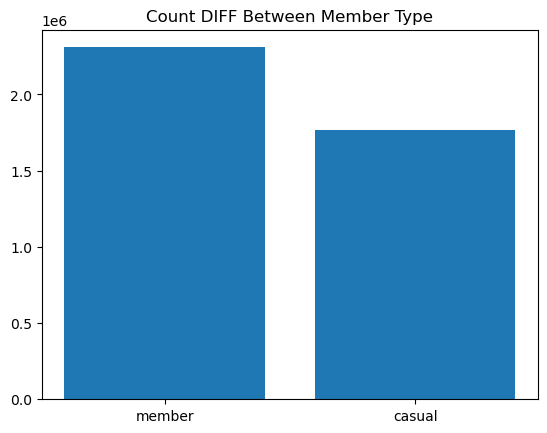

In [176]:
# since polars can't integrate with plots libraries directly, we've converted the DF to pandas:
dfp = count_member_type.to_pandas()

plt.bar(dfp["member_casual"], dfp["ride_count"])

plt.title('Count DIFF Between Member Type')
plt.ylabel("")

plt.show()

In [177]:
#2- How long do ‘casual’ and ‘member’ riders spend on the trip (Average)?

In [178]:
# calculate the average trip duration by member_casual:
avg_trip_user = df.group_by('member_casual').agg([
    pl.col('ride_id').count().alias('ride_count'),
    pl.col('trip_duration').mean().alias('avg_trip_duration')]).with_columns(
    (pl.col('ride_count') / pl.col('ride_count').sum() * 100).round(2).alias('pct_of_total_rides')).sort(by='ride_count', descending=True)

avg_trip_user

member_casual,ride_count,avg_trip_duration,pct_of_total_rides
str,u32,duration[ns],f64
"""member""",2309603,13m 29s 367592612ns,56.63
"""casual""",1769104,22m 48s 233196013ns,43.37


In [179]:
# calculate the average trip duration by member_casual and rideable_type:
avg_trip_user_ride_type = df.group_by(['member_casual', 'rideable_type']).agg([
    pl.col('ride_id').count().alias('ride_count'),
    pl.col('trip_duration').mean().alias('avg_trip_duration')]).with_columns(
    (pl.col('ride_count') / pl.col('ride_count').sum() * 100).round(2).alias('pct_of_total_rides')).sort(by='ride_count', descending=True)

avg_trip_user_ride_type

member_casual,rideable_type,ride_count,avg_trip_duration,pct_of_total_rides
str,str,u32,duration[ns],f64
"""member""","""classic_bike""",1341711,13m 38s 617109049ns,32.9
"""casual""","""classic_bike""",876243,21m 38s 50540774ns,21.48
"""member""","""docked_bike""",491049,14m 4s 448110066ns,12.04
"""casual""","""docked_bike""",484930,27m 54s 273565256ns,11.89
"""member""","""electric_bike""",476843,12m 27s 216253567ns,11.69
"""casual""","""electric_bike""",407931,19m 15s 179773049ns,10.0


In [180]:
# calculate the average trip duration by member_casual and day of week:
avg_trip_user_day_of_week = df.group_by(['day_of_week','member_casual']).agg([
    pl.col('ride_id').count().alias('ride_count'),
    pl.col('trip_duration').mean().alias('avg_trip_duration')]).with_columns(
    (pl.col('ride_count') / pl.col('ride_count').sum() * 100).round(2).alias('pct_of_total_rides')).sort(by='day_of_week', descending=False)


avg_trip_user_day_of_week

day_of_week,member_casual,ride_count,avg_trip_duration,pct_of_total_rides
i8,str,u32,duration[ns],f64
1,"""member""",314989,13m 1s 613580156ns,7.72
1,"""casual""",197219,23m 3s 757244484ns,4.84
2,"""casual""",189721,21m 11s 29669883ns,4.65
2,"""member""",346352,12m 49s 720457800ns,8.49
3,"""casual""",190867,20m 38s 194763893ns,4.68
3,"""member""",353323,12m 54s 97016044ns,8.66
4,"""member""",336982,12m 44s 966971529ns,8.26
4,"""casual""",195031,20m 9s 197922381ns,4.78
5,"""member""",338064,13m 6s 201015192ns,8.29


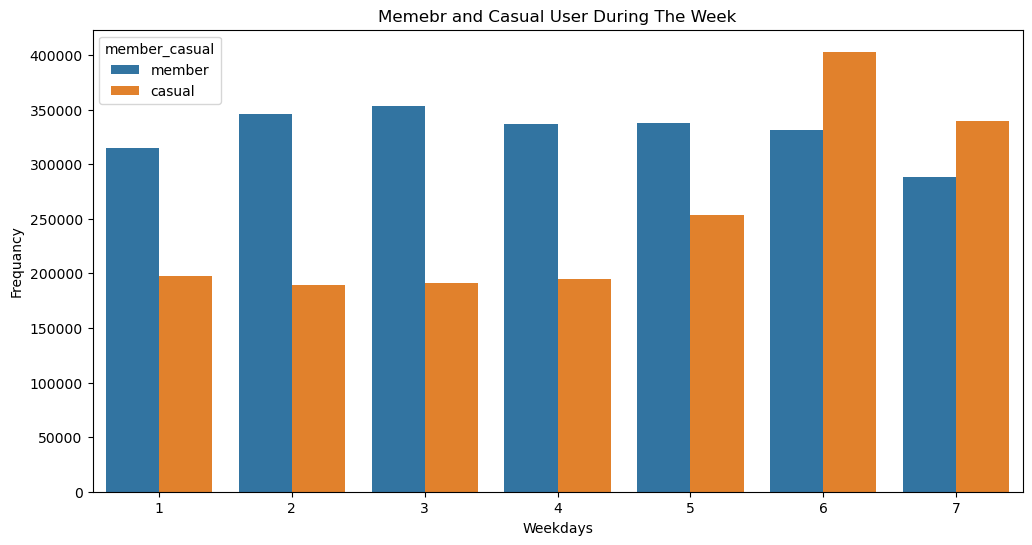

In [219]:
# plotting the day of week:
dfp = avg_trip_user_day_of_week.to_pandas()

plt.figure(figsize=(12,6))
sns.barplot(data=dfp, x='day_of_week', y='ride_count', hue='member_casual')
plt.title('Memebr and Casual User During The Week')
plt.xlabel('Weekdays')
plt.ylabel('Frequancy')

plt.legend(title='member_casual' ,loc='upper left')
plt.show()

In [181]:
# members used the bikes in the weekdays thats explain they're using it as a transportation for thier work, while the casual using more at the weekend!

In [182]:
#3- In each month, how many casual and member riders through the year?

In [183]:
# calculate the average trip duration by member_casual and day of week:
avg_trip_user_month_year = df.group_by(['month_year','member_casual']).agg([
    pl.col('ride_id').count().alias('ride_count'),
    pl.col('trip_duration').mean().alias('avg_trip_duration')]).with_columns(
    (pl.col('ride_count') / pl.col('ride_count').sum() * 100).round(2).alias('pct_of_total_rides')).sort(by='month_year', descending=False)


avg_trip_user_month_year

month_year,member_casual,ride_count,avg_trip_duration,pct_of_total_rides
str,str,u32,duration[ns],f64
"""2020-09""","""casual""",198959,24m 21s 719650782ns,4.88
"""2020-09""","""member""",279459,14m 27s 540927291ns,6.85
"""2020-10""","""casual""",115694,21m 51s 950662955ns,2.84
"""2020-10""","""member""",212157,13m 10s 652865566ns,5.2
"""2020-11""","""casual""",68978,22m 47s 386413059ns,1.69
"""2020-11""","""member""",147484,13m 8s 140950882ns,3.62
"""2020-12""","""member""",88217,12m 5s 675096636ns,2.16
"""2020-12""","""casual""",23615,19m 4s 743595172ns,0.58
"""2021-01""","""member""",68158,11m 46s 712638281ns,1.67


/var/folders/k8/y0z2plnn5txb3ts2cb5njn7m0000gn/T/ipykernel_93647/160846489.py:5: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="ride_count", index="month_year", columns="member_casual")


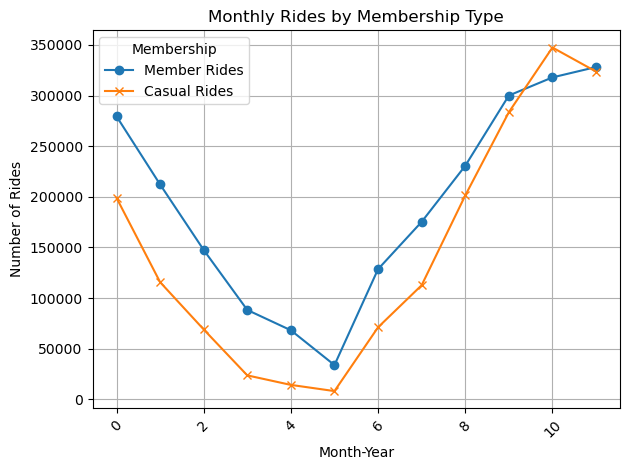

In [184]:
# Count rides per month/year and member type
measures = (
    df.group_by(["month_year", "member_casual"])
      .agg(pl.col("ride_id").count().alias("ride_count"))
      .pivot(values="ride_count", index="month_year", columns="member_casual")
      .sort("month_year")
)

pdf = measures.to_pandas()

plt.plot(pdf.index, pdf["member"], label="Member Rides", marker="o")
plt.plot(pdf.index, pdf["casual"], label="Casual Rides", marker="x")

plt.title("Monthly Rides by Membership Type")
plt.xlabel("Month-Year")
plt.ylabel("Number of Rides")
plt.legend(title="Membership")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
# both lines droped in the winter months, then casual rides spikes more than members, - 
# thats explain a holiday that people come from diff locations in a short of time so they didn't need to become a members. 

# they could do more offers in the last month before the spike like have a free month, so they can expand their suscripstions. -
# in the spike months they should do more ads to improve brand awarness. 

In [186]:
#4- What are the types of bikes that ‘casual’ and ‘member’ riders ride?

In [187]:
# doing group by to see how much ride type of each member casual:
type_bike = df.group_by(['rideable_type', 'member_casual']).agg(
    pl.col('ride_id').count().alias('ride_count')).sort(by='ride_count', descending=True)

type_bike

rideable_type,member_casual,ride_count
str,str,u32
"""classic_bike""","""member""",1341711
"""classic_bike""","""casual""",876243
"""docked_bike""","""member""",491049
"""docked_bike""","""casual""",484930
"""electric_bike""","""member""",476843
"""electric_bike""","""casual""",407931


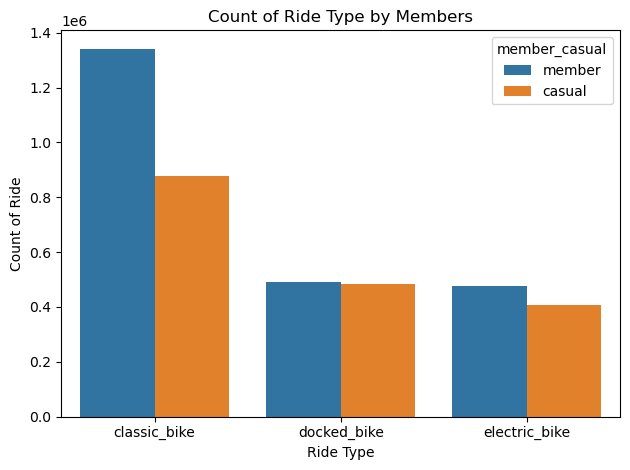

In [188]:
# plotting with sns to show the results:
dfp = type_bike.to_pandas()

sns.barplot(data=dfp, x= 'rideable_type', y='ride_count', hue='member_casual')
plt.title('Count of Ride Type by Members')
plt.xlabel('Ride Type')
plt.ylabel('Count of Ride')
plt.tight_layout()

plt.show()


In [189]:
#5- Which stations are the top start stations for ‘casual’ and ‘member’ riders?

#6- Which stations are the top destinations for ‘casual’ and ‘member’ riders?

In [190]:
# start station by members:
start_member = (
    df.filter(pl.col("member_casual") == "member")
      .group_by("start_station_name")
      .agg(pl.col("ride_id").count().alias("ride_count"))
      .sort("ride_count", descending=True)
      .head(10))

start_member

start_station_name,ride_count
str,u32
"""Clark St & Elm St""",22973
"""Wells St & Concord Ln""",20326
"""Kingsbury St & Kinzie St""",19632
"""Wells St & Elm St""",18487
"""Dearborn St & Erie St""",17487
"""St. Clair St & Erie St""",17203
"""Wells St & Huron St""",17010
"""Broadway & Barry Ave""",17006
"""Theater on the Lake""",16176


In [191]:
# start station by casual:
start_casual = (
    df.filter(pl.col('member_casual') == 'casual')
    .group_by('start_station_name')
    .agg(pl.col('ride_id').count().alias('ride_count'))
    .sort('ride_count', descending=True)
    .head(10))

start_casual 

start_station_name,ride_count
str,u32
"""Streeter Dr & Grand Ave""",50934
"""Millennium Park""",26678
"""Michigan Ave & Oak St""",24619
"""Lake Shore Dr & Monroe St""",24202
"""Theater on the Lake""",20000
"""Shedd Aquarium""",19421
"""Lake Shore Dr & North Blvd""",17101
"""Wells St & Concord Ln""",16025
"""Indiana Ave & Roosevelt Rd""",14662


In [192]:
# end station by members:
end_members = (
    df.filter(pl.col('member_casual') == 'member')
    .group_by('end_station_name')
    .agg(pl.col('ride_id').count().alias('ride_count'))
    .sort('ride_count', descending = True)
    .head(10))

end_members

end_station_name,ride_count
str,u32
"""Clark St & Elm St""",23354
"""Wells St & Concord Ln""",20935
"""Kingsbury St & Kinzie St""",20037
"""Wells St & Elm St""",18699
"""Dearborn St & Erie St""",17955
"""St. Clair St & Erie St""",17655
"""Broadway & Barry Ave""",17340
"""Wells St & Huron St""",16308
"""Theater on the Lake""",15132


In [193]:
# end station by casual:
end_casual = (
    df.filter(pl.col('member_casual') == 'casual')
    .group_by('end_station_name')
    .agg(pl.col('ride_id').count().alias('ride_count'))
    .sort('ride_count', descending=True)
    .head(10)
)

end_casual

end_station_name,ride_count
str,u32
"""Streeter Dr & Grand Ave""",53241
"""Millennium Park""",28706
"""Michigan Ave & Oak St""",25858
"""Lake Shore Dr & Monroe St""",22980
"""Theater on the Lake""",21759
"""Lake Shore Dr & North Blvd""",20113
"""Shedd Aquarium""",17476
"""Wells St & Concord Ln""",16031
"""Clark St & Lincoln Ave""",14819


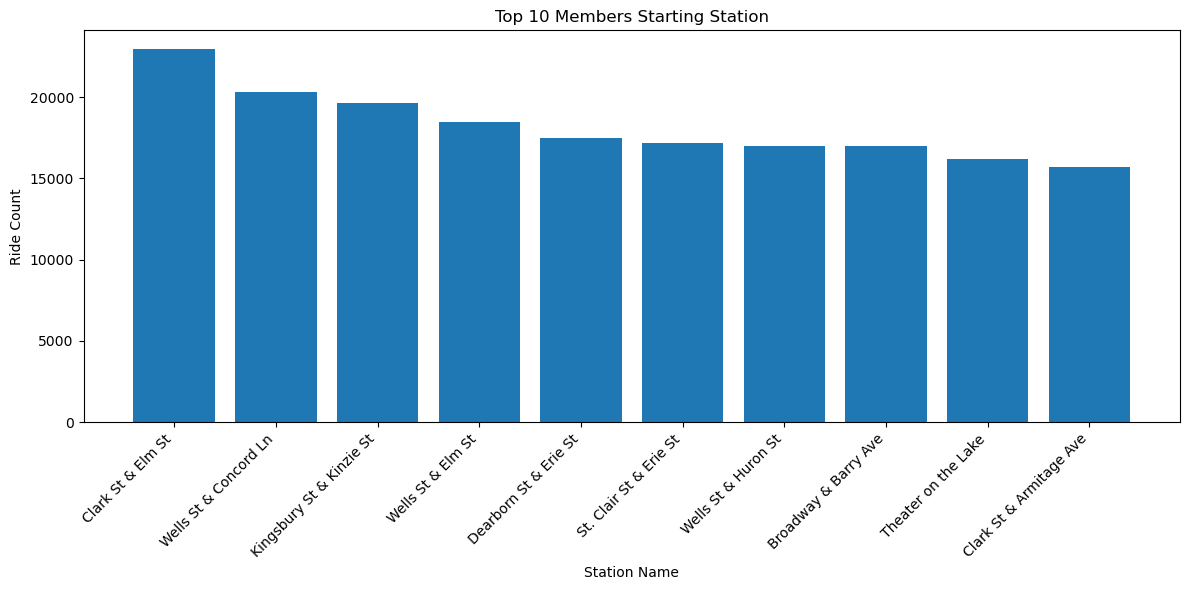

In [194]:
# start member station name bar plot:

dfp = start_member.to_pandas()

plt.figure(figsize=(12,6))
plt.bar(dfp['start_station_name'], dfp['ride_count'])
plt.title('Top 10 Members Starting Station')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

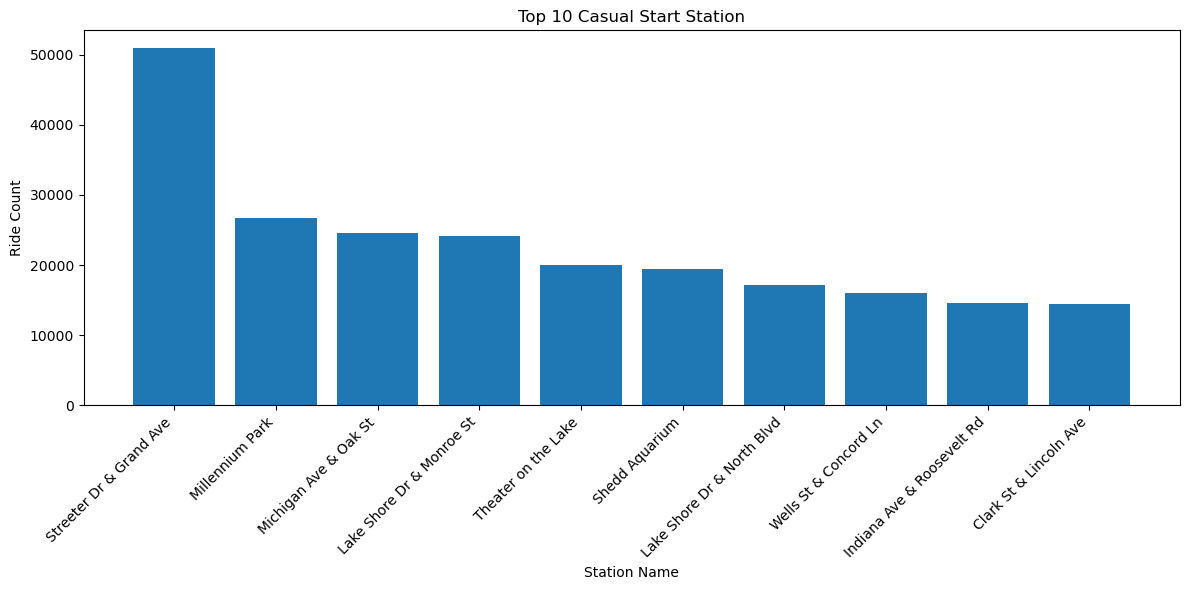

In [196]:
# start casual station name bar plot:

dfp = start_casual.to_pandas()

plt.figure(figsize=(12,6))
plt.bar(dfp['start_station_name'], dfp['ride_count'])
plt.title('Top 10 Casual Start Station')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

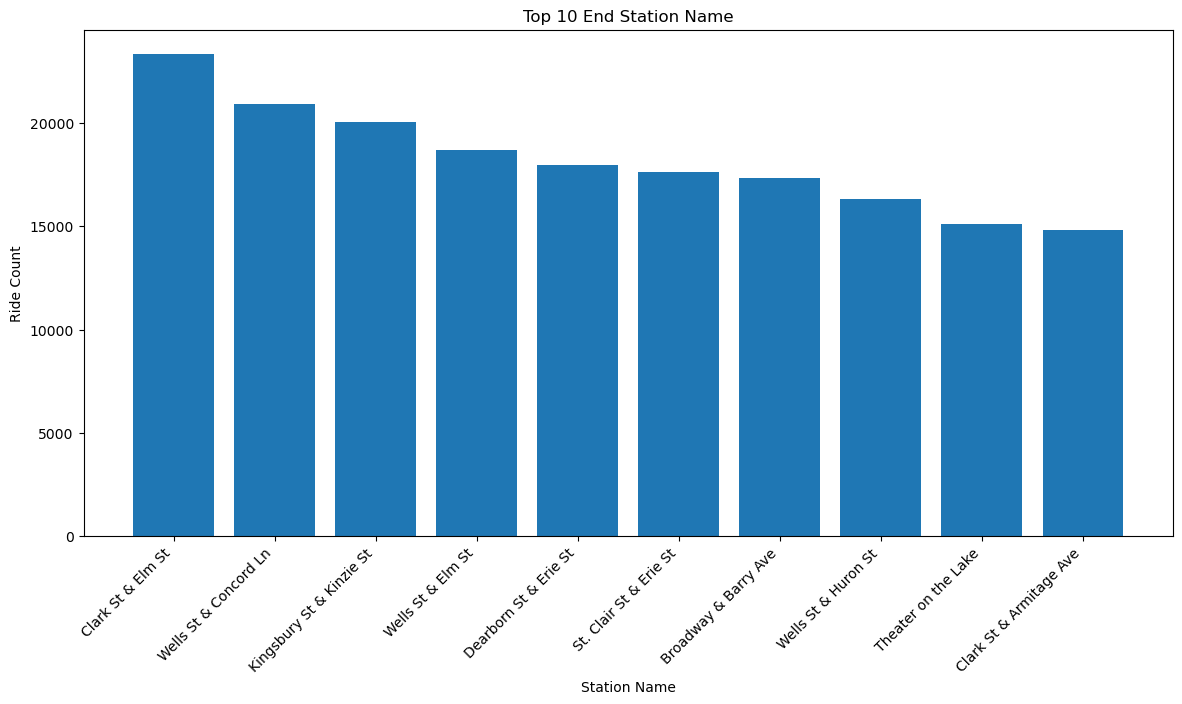

In [197]:
# end member station name bar plot:

dfp = end_members.to_pandas()

plt.figure(figsize= (12,6))
plt.bar(dfp['end_station_name'], dfp['ride_count'])
plt.title('Top 10 Member End Station Name')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

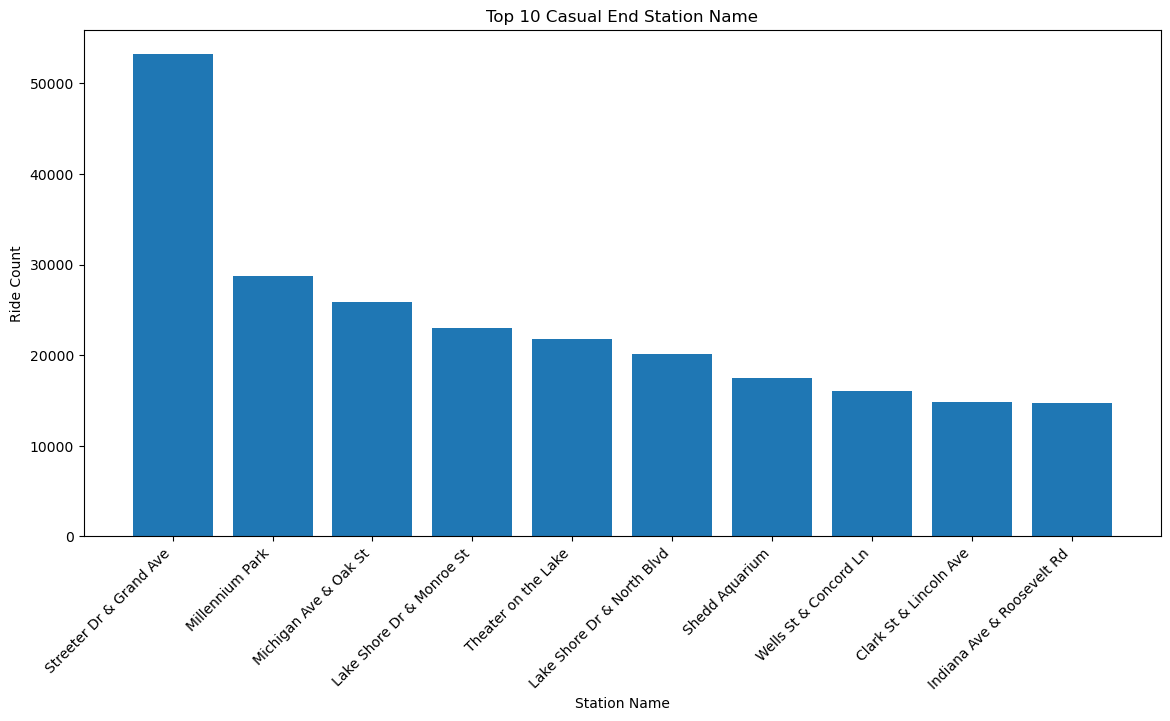

In [198]:
# end casual station name bar plot:

dfp = end_casual.to_pandas()

plt.figure(figsize= (12,6))
plt.bar(dfp['end_station_name'], dfp['ride_count'])
plt.title('Top 10 Casual End Station Name')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()